In [1]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

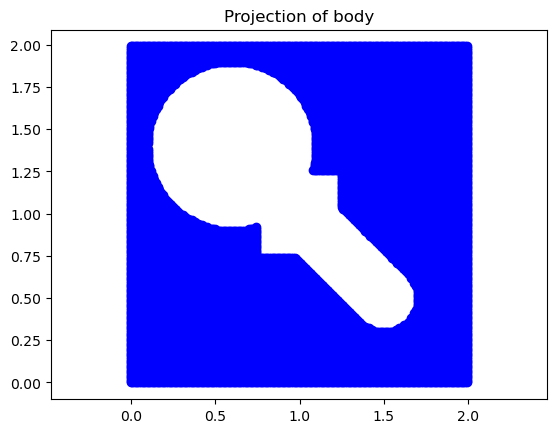

In [2]:
# Load data from the file
data1 = np.loadtxt("data/RayOriginsCapF.dat", delimiter=',')
x1, y1 = data1[:, 0], data1[:, 1]
# Scatter plot the points
plt.scatter(x1, y1, c='blue', label='Active Ray Origins')
plt.axis('equal')
plt.title('Projection of body')
# Show the plot
plt.show()

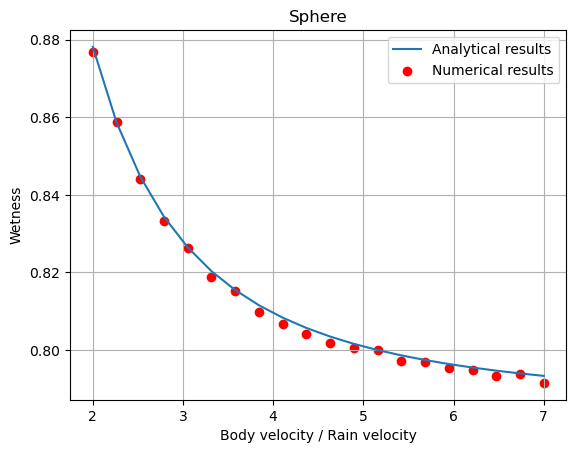

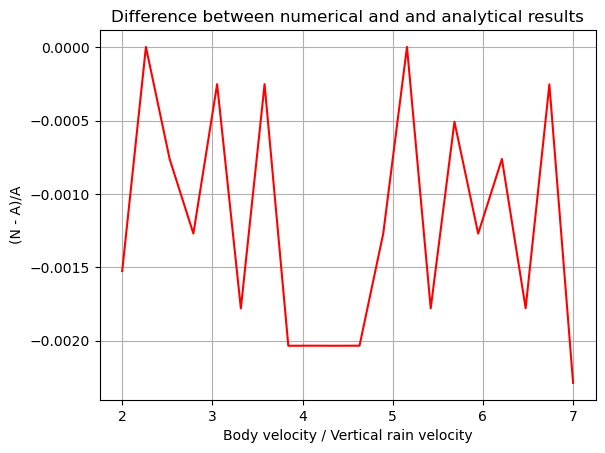

In [3]:
# Read the data from the file
with open("data/CompareSphere.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.plot(x_values, y1_values, label='Analytical results')
plt.scatter(x_values, y2_values, color='red', label='Numerical results')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('Sphere')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Vertical rain velocity')
plt.ylabel('(N - A)/A')
plt.title('Difference between numerical and and analytical results')
plt.grid(True)

# Show the plot
plt.show()


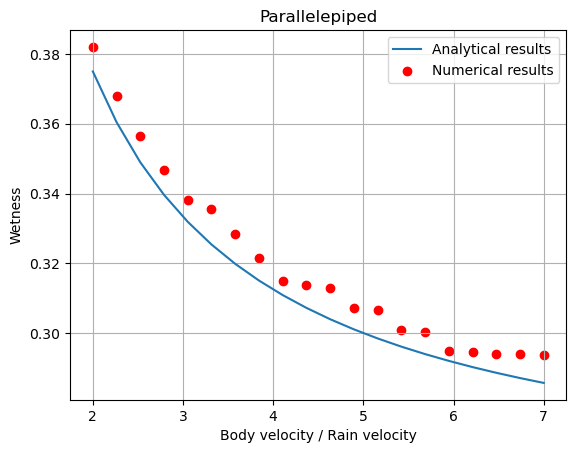

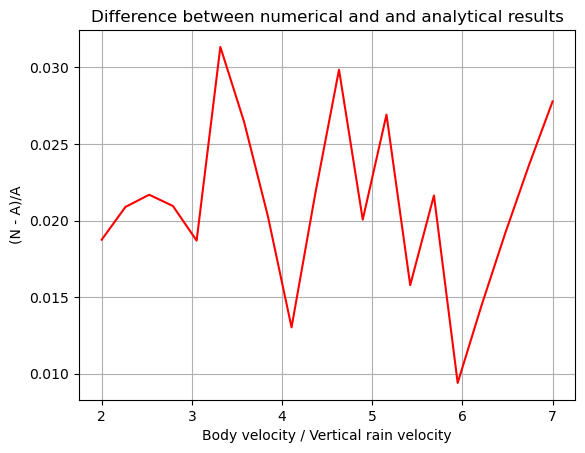

In [4]:
# Read the data from the file
with open("data/ComparePippo.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.plot(x_values, y1_values, label='Analytical results')
plt.scatter(x_values, y2_values, color='red', label='Numerical results')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('Parallelepiped')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Vertical rain velocity')
plt.ylabel('(N - A)/A')
plt.title('Difference between numerical and and analytical results')
plt.grid(True)

# Show the plot
plt.show()

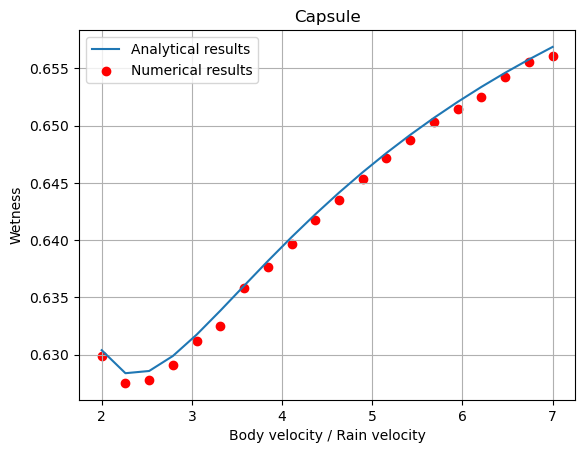

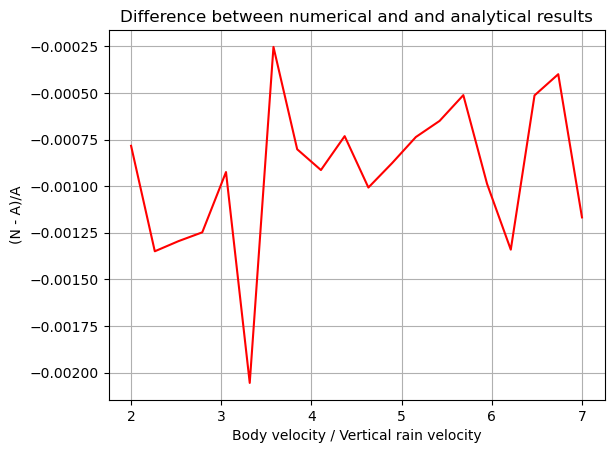

In [5]:
# Read the data from the file
with open("data/CompareCapsule.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.plot(x_values, y1_values, label='Analytical results')
plt.scatter(x_values, y2_values, color='red', label='Numerical results')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('Capsule')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Vertical rain velocity')
plt.ylabel('(N - A)/A')
plt.title('Difference between numerical and and analytical results')
plt.grid(True)

# Show the plot
plt.show()

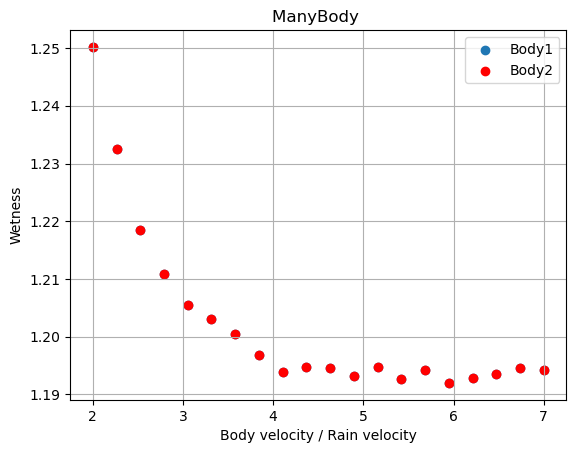

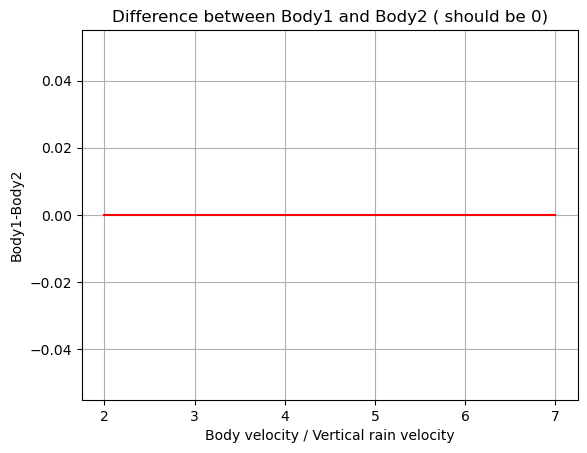

In [6]:
# Read the data from the file
with open("data/CompareManyBody.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.scatter(x_values, y1_values, label='Body1')
plt.scatter(x_values, y2_values, color='red', label='Body2')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('ManyBody ')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Vertical rain velocity')
plt.ylabel('Body1-Body2')
plt.title('Difference between Body1 and Body2 ( should be 0)')
plt.grid(True)

# Show the plot
plt.show()

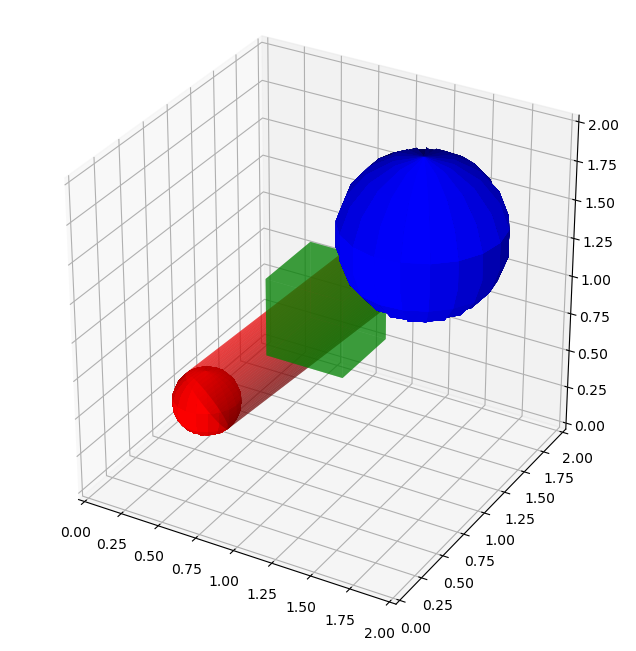

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_geometric_bodies(filename):

    # Function to draw a sphere
    def draw_sphere(ax, center, radius, col ):
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
        y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
        z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_surface(x, y, z, color=col, alpha=0.6)

    # Function to draw a parallelepiped
    def draw_parallelepiped(ax, center, sides):
        # Create the vertices of the parallelepiped
        s1, s2, s3 = sides
        d = np.array([s1, s2, s3])
        corner = center - 0.5 * d.sum(axis=0)
        vertices = np.array([corner + sum(d[i] for i in range(3) if k & (1 << i)) for k in range(8)])
        # Create the faces of the parallelepiped
        faces = [[vertices[j] for j in [0, 1, 3, 2]], [vertices[j] for j in [4, 5, 7, 6]], 
                [vertices[j] for j in [0, 1, 5, 4]], [vertices[j] for j in [2, 3, 7, 6]], 
                [vertices[j] for j in [1, 3, 7, 5]], [vertices[j] for j in [0, 2, 6, 4]]]
        # Draw the faces
        pc = Poly3DCollection(faces, alpha=0.5, facecolors='green')
        ax.add_collection3d(pc)

    # Function to draw a capsule (a cylinder with two hemispheres at the ends)
    def draw_capsule(ax, point1, point2, radius):
        # Vector from point1 to point2
        v = np.array(point2) - np.array(point1)
        length = np.linalg.norm(v)
        if length == 0:
            # If the points are too close, they can't form a capsule. Draw a sphere instead.
            draw_sphere(ax, point1, radius)
            return

        # Create a rotation matrix to rotate the points in the xy-plane around the z-axis
        # to the line defined by point1 and point2
        v /= length  # Normalize the vector
        theta = np.arccos(v[2])
        phi = np.arctan2(v[1], v[0])
        
        # Rotation matrix around y-axis
        rot_matrix_y = np.array([
            [np.cos(theta), 0, np.sin(theta)],
            [0, 1, 0],
            [-np.sin(theta), 0, np.cos(theta)]
        ])
        
        # Rotation matrix around z-axis
        rot_matrix_z = np.array([
            [np.cos(phi), -np.sin(phi), 0],
            [np.sin(phi), np.cos(phi), 0],
            [0, 0, 1]
        ])
        
        # Combined rotation matrix
        rot_matrix = np.dot(rot_matrix_z, rot_matrix_y)
        
        # Create points for the cylinder along the z-axis (we will rotate these points later)
        theta = np.linspace(0, 2 * np.pi, 100)
        z = np.linspace(-length / 2, length / 2, 2)
        theta, z = np.meshgrid(theta, z)
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        
        # Initialize the points array
        points = np.vstack((x.flatten(), y.flatten(), z.flatten()))
        
        # Rotate and translate the points
        points = np.dot(rot_matrix, points).T + (point1 + point2) / 2.0
        
        # Reshape points to a grid for the surface
        X, Y, Z = points[:, 0].reshape(z.shape), points[:, 1].reshape(z.shape), points[:, 2].reshape(z.shape)
        
        # Plot the surface of the cylinder
        ax.plot_surface(X, Y, Z, color='red', alpha=0.5)
        
        # Add hemispheres at the ends
        draw_sphere(ax, point1, radius, 'red')
        draw_sphere(ax, point2, radius, 'red')


    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Read the data from the file and visualize
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            body_type = parts[0]
            params = list(map(float, parts[1:]))

            if body_type == 'S':  # Sphere
                center = np.array(params[:3])
                radius = params[3]
                draw_sphere(ax, center, radius, 'b')

            elif body_type == 'P':  # Parallelepiped
                center = np.array(params[:3])
                sides = np.array(params[3:]).reshape((3, 3))
                draw_parallelepiped(ax, center, sides)

            elif body_type == 'C':  # Capsule
                point1 = np.array(params[:3])
                point2 = np.array(params[3:6])
                radius = params[6]
                draw_capsule(ax, point1, point2, radius)

    # Set the aspect ratio
    ax.set_box_aspect([1,1,1])
    # Set the limits for each axis
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])

    # Optionally adjust the view before showing the plot
    #ax.view_init(elev=30, azim=30)

    # Show the plot
    plt.show()

plot_geometric_bodies('data/BodyState1.dat')
    

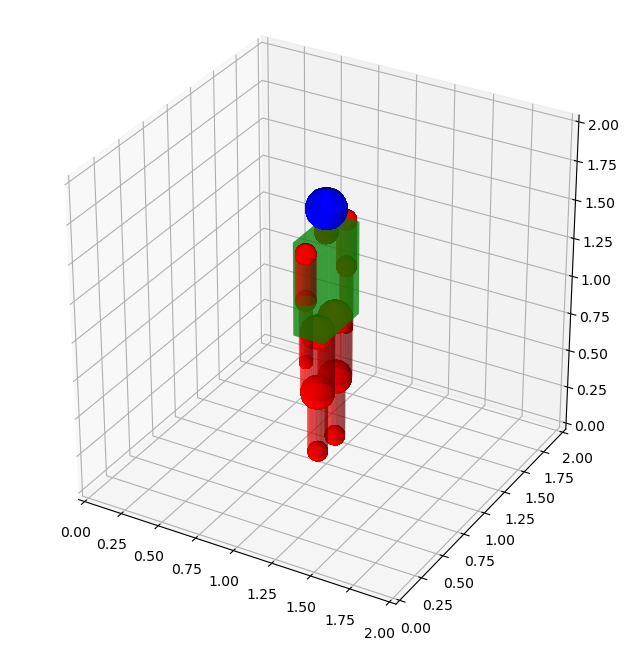

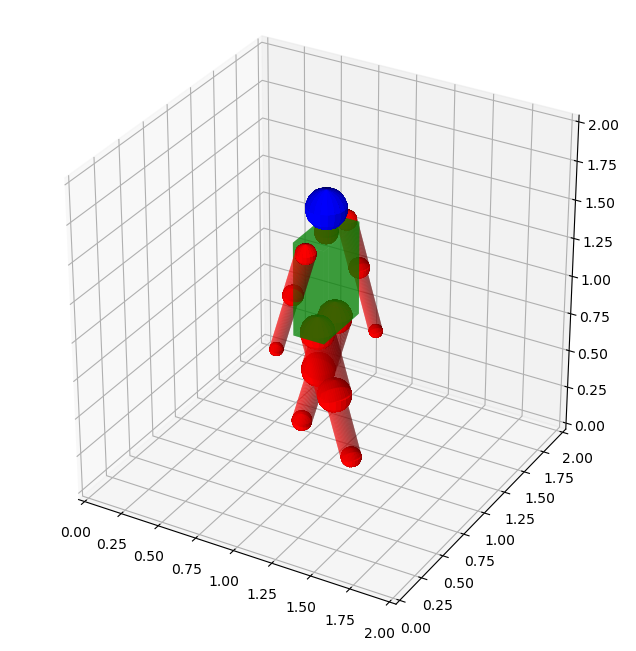

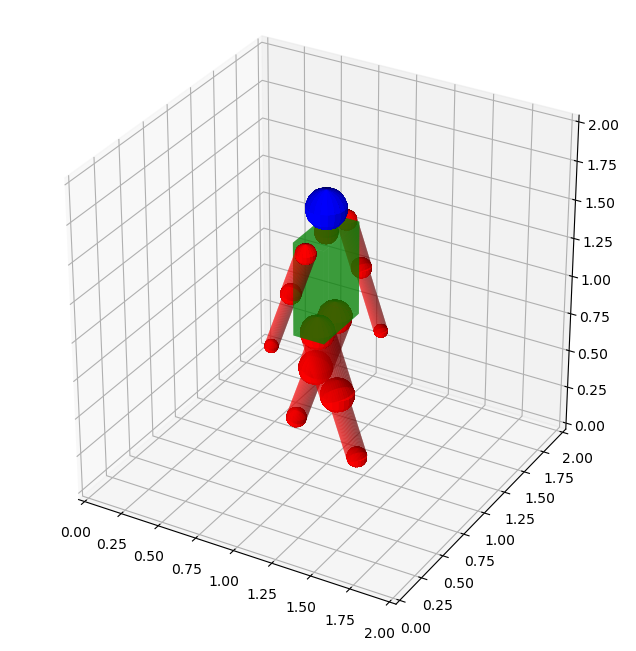

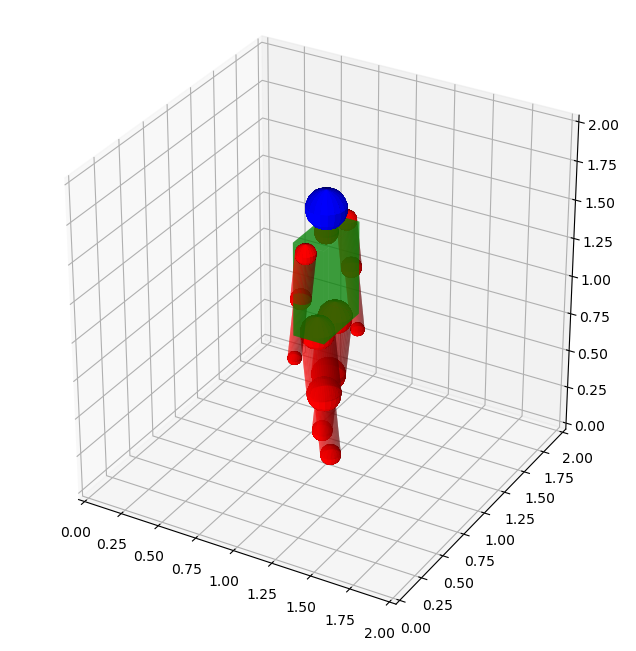

In [17]:
plot_geometric_bodies('data/Walk0.dat')
plot_geometric_bodies('data/Walk3.dat')
plot_geometric_bodies('data/Walk6.dat')
plot_geometric_bodies('data/Walk9.dat')

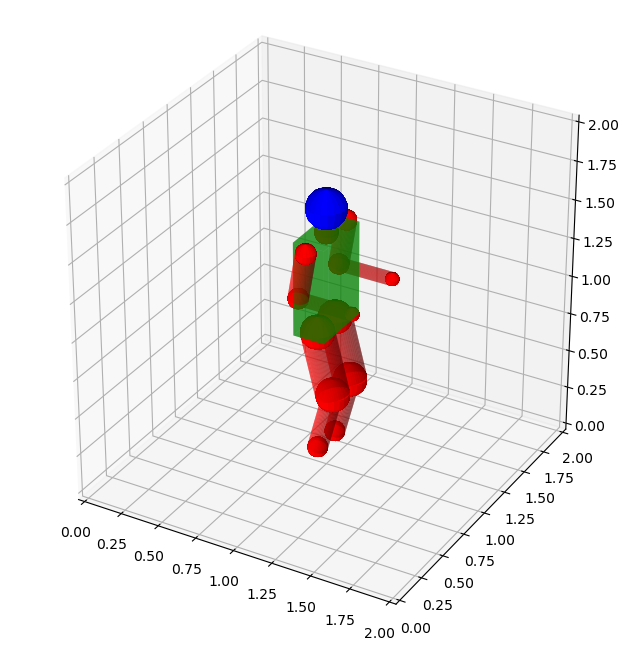

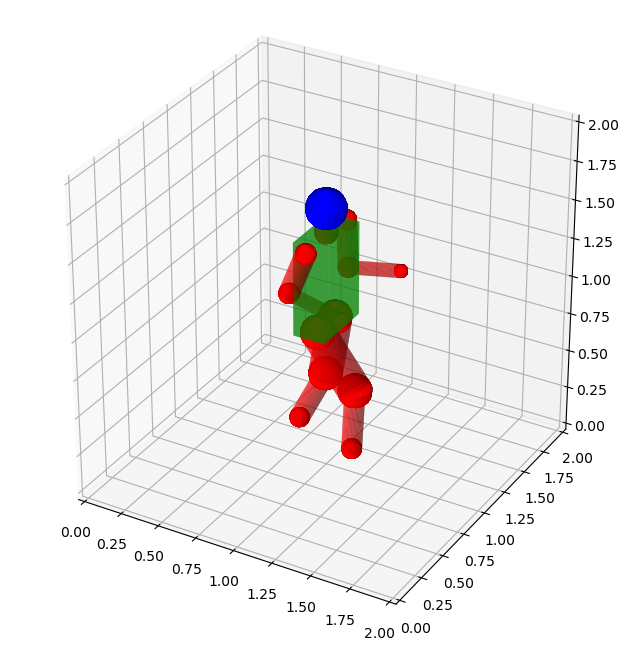

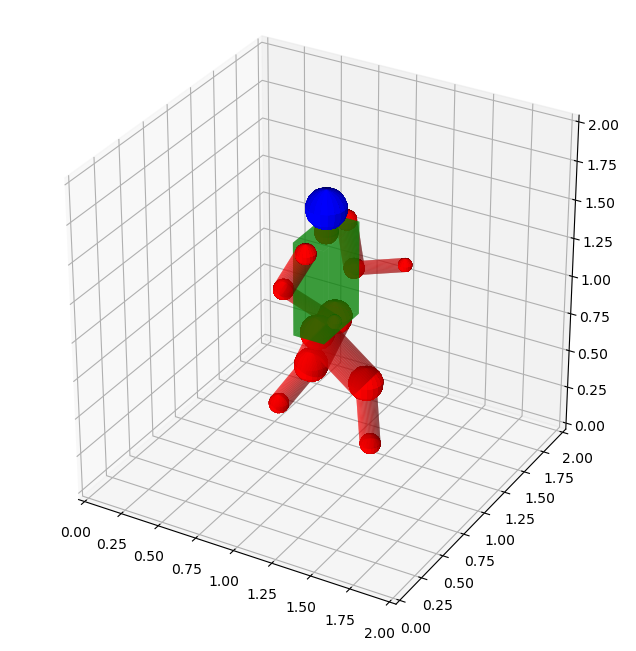

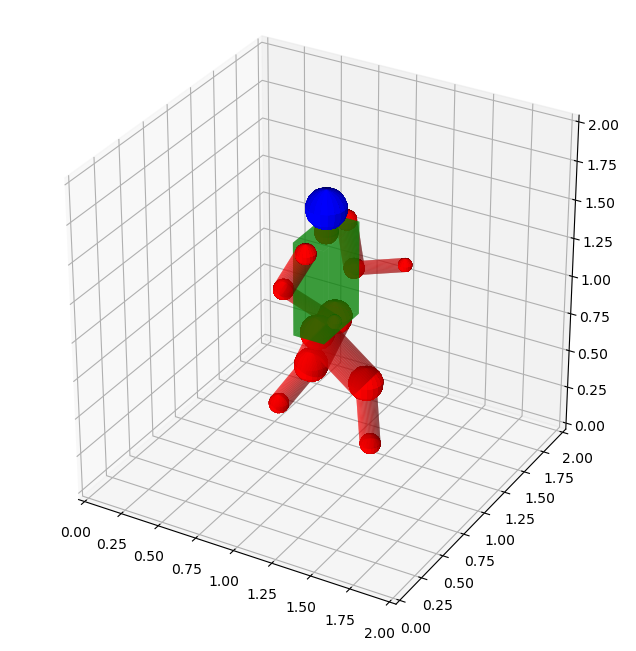

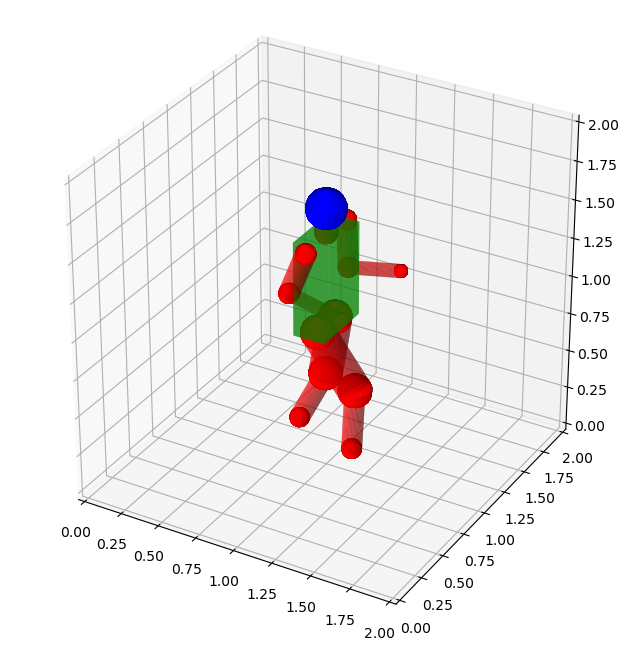

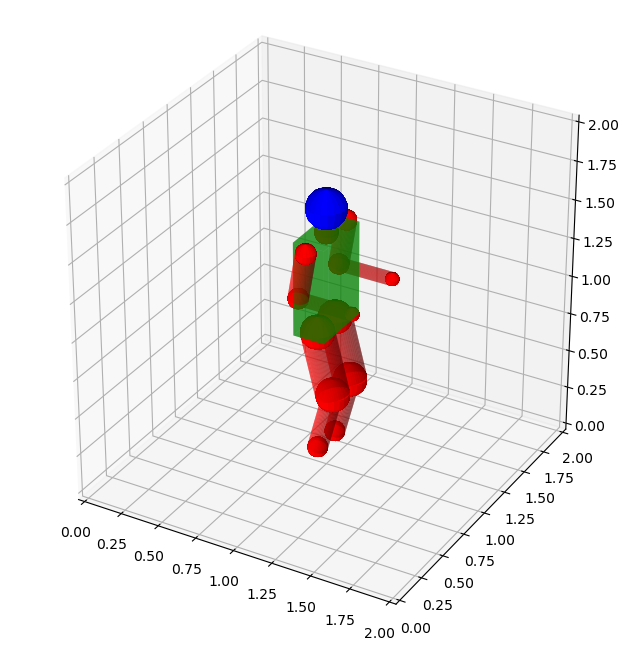

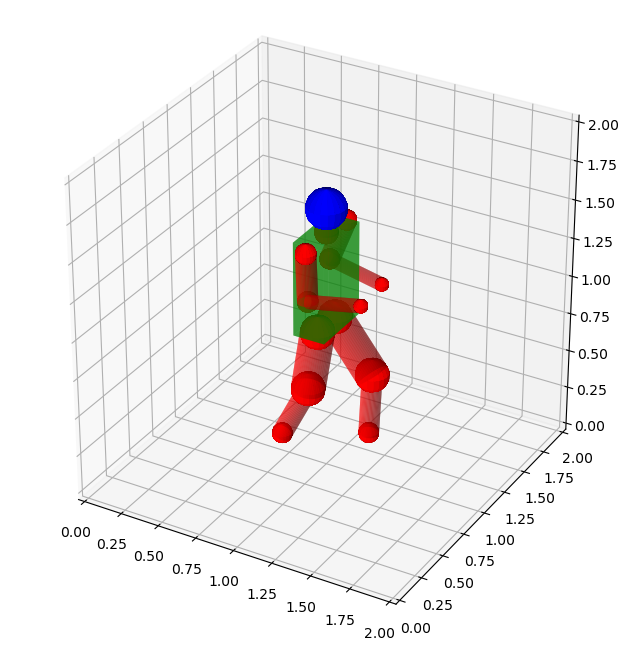

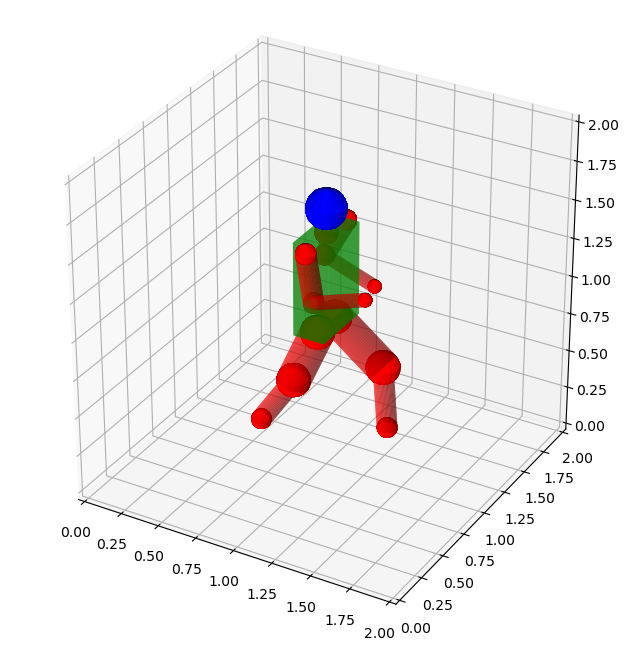

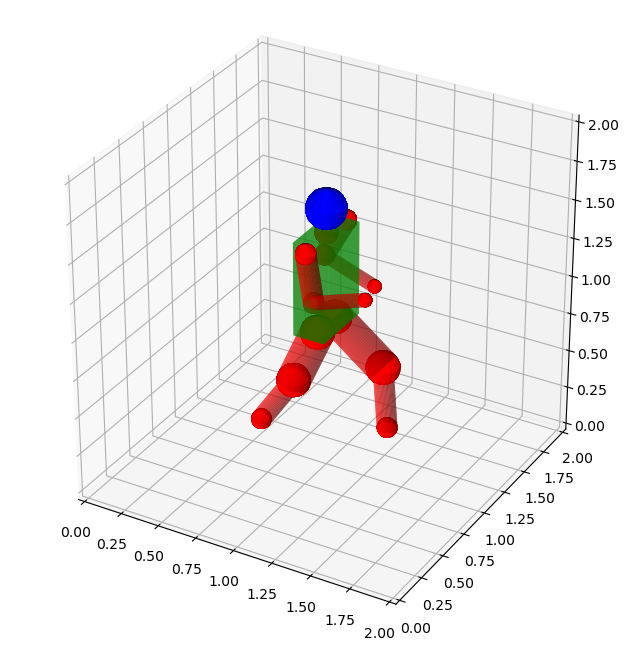

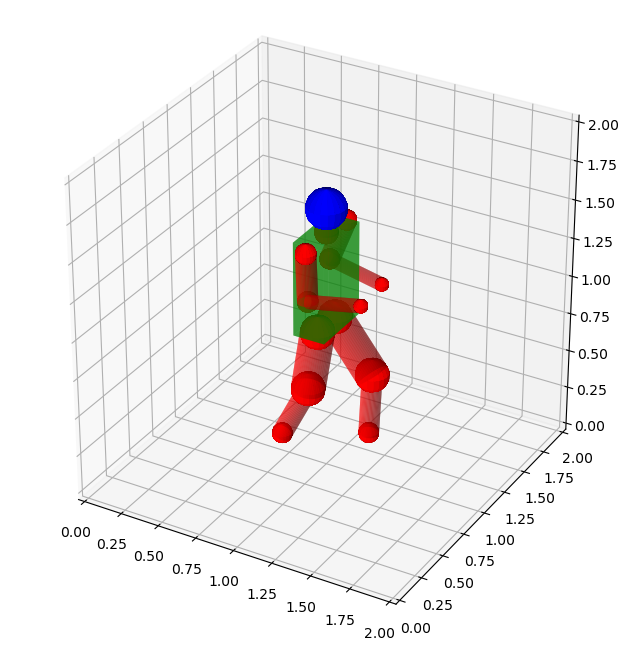

In [20]:
plot_geometric_bodies('data/Run0.dat')
plot_geometric_bodies('data/Run1.dat')
plot_geometric_bodies('data/Run2.dat')
plot_geometric_bodies('data/Run3.dat')
plot_geometric_bodies('data/Run4.dat')
plot_geometric_bodies('data/Run5.dat')
plot_geometric_bodies('data/Run6.dat')
plot_geometric_bodies('data/Run7.dat')
plot_geometric_bodies('data/Run8.dat')
plot_geometric_bodies('data/Run9.dat')

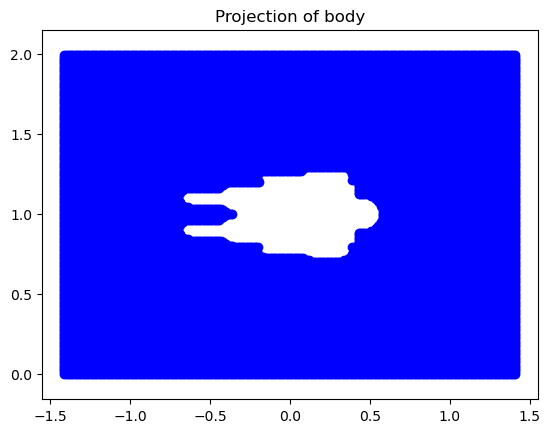

In [10]:
# Load data from the file
data1 = np.loadtxt("data/WalkProjF.dat", delimiter=',')
x1, y1 = data1[:, 0], data1[:, 1]
# Scatter plot the points
plt.scatter(x1, y1, c='blue', label='Active Ray Origins')
plt.axis('equal')

plt.title('Projection of body')
# Show the plot
plt.show()